In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

import seaborn as sns


In [41]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


# Use the iris database to answer the following questions:

In [67]:
iris = sns.load_dataset("iris")
iris2 = data("iris")

In [43]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [45]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## What does the distribution of petal lengths look like?

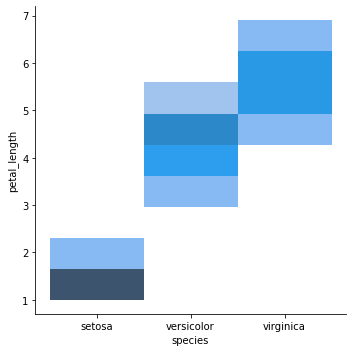

In [7]:
sns.displot(data=iris, x="species", y="petal_length")

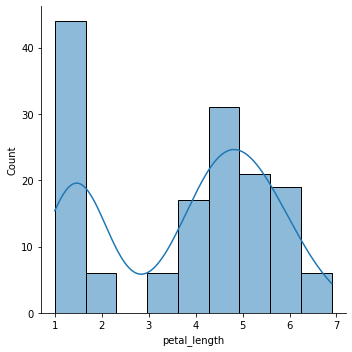

In [47]:
sns.displot(iris.petal_length, kde=True)

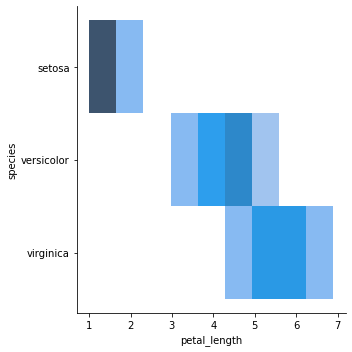

In [15]:
sns.displot(data=iris, x="petal_length", y="species")

This distribution is fairly symmetric, uniform, and although there is notable variation when considering petal length individually,  
there is little variety within the particular species. 

## Is there a correlation between petal length and petal width?   
## Use http://guessthecorrelation.com/ as a hint to how we could visually   
## determine if a correlation exists between two numeric columns.

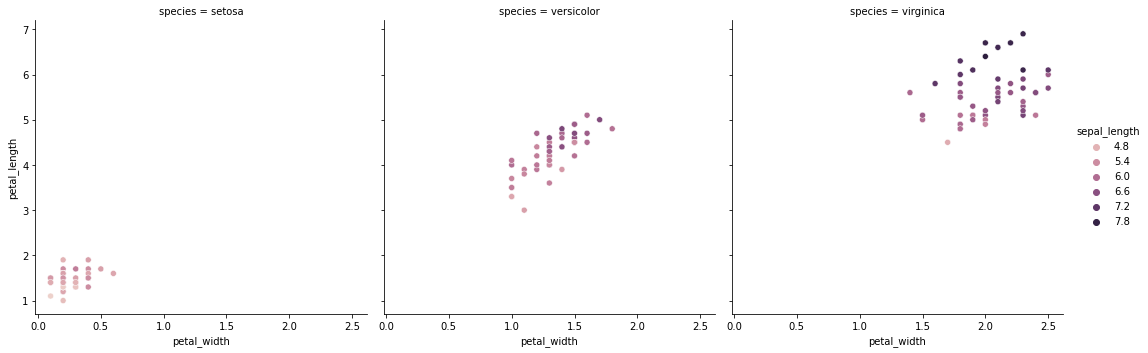

In [14]:
sns.relplot(data=iris,
            x="petal_width",
            y="petal_length",
            hue="sepal_length",
            col="species"
)

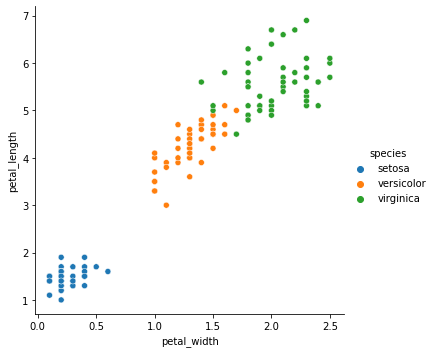

In [48]:
sns.relplot(data=iris,
            x="petal_width",
            y="petal_length",
            hue = 'species'
           )

#### Measuring correlation
##### The sample correlation coefficient, r, quantifies the strength of the relationship. Correlations are also tested for statistical significance.

In [29]:
# Call numpy.corrcoef(x,y) with x and y as an array-like object of the same length to return a correlation coefficient matrix between x and y.
# Use the indexing syntax [0,1] to slice the array of the previous result to get the coefficient of correlation or R,
# and square this value to get the coefficient of determination, R squared.

# correlation_matrix = np.corrcoef(petal_width, petal_length)

# pandas.DataFrame.corr computes pairwise correlation of columns. More useful in this scenario. 

iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


r for petal_length and petal_width = ~ 0.96, indicating a strong linear relationship. 
Since r is positive, this indicates a positive correlation, demonstrated by the visualization
as the values of both variables are increased together. With N = 150, altogether the strength of 
our sample size is not extensive. 

## Would it be reasonable to predict species based on   
## sepal width and sepal length? For this, you'll visualize   
## two numeric columns through the lense of a categorical column.

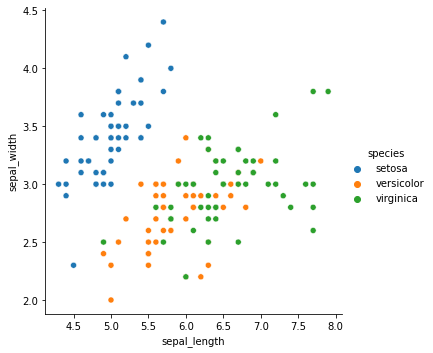

In [31]:
sns.relplot(data=iris,
            x="sepal_length",
            y="sepal_width",
            hue="species"
)

Predictions based upon the length and width of sepal would be impractical.    
Versicolor and Virginica have plenty of overlap;   
Setosa could be predicted with reasonable accuracy, but it wouldn't be foolproof. 

## Which features would be best used to predict species?

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

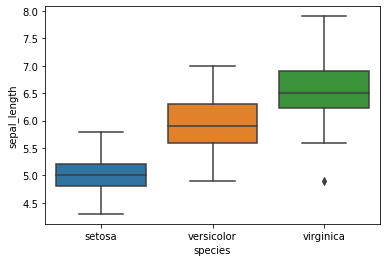

In [49]:
sns.boxplot(y = 'sepal_length', x = 'species', data = iris)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

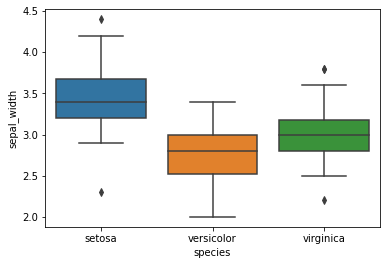

In [50]:
sns.boxplot(y = 'sepal_width', x = 'species', data = iris)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

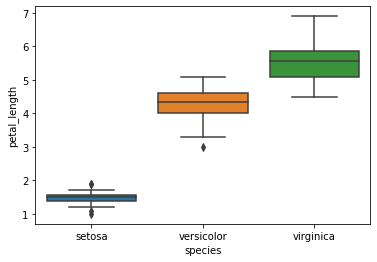

In [51]:
sns.boxplot(y = 'petal_length', x = 'species', data = iris)

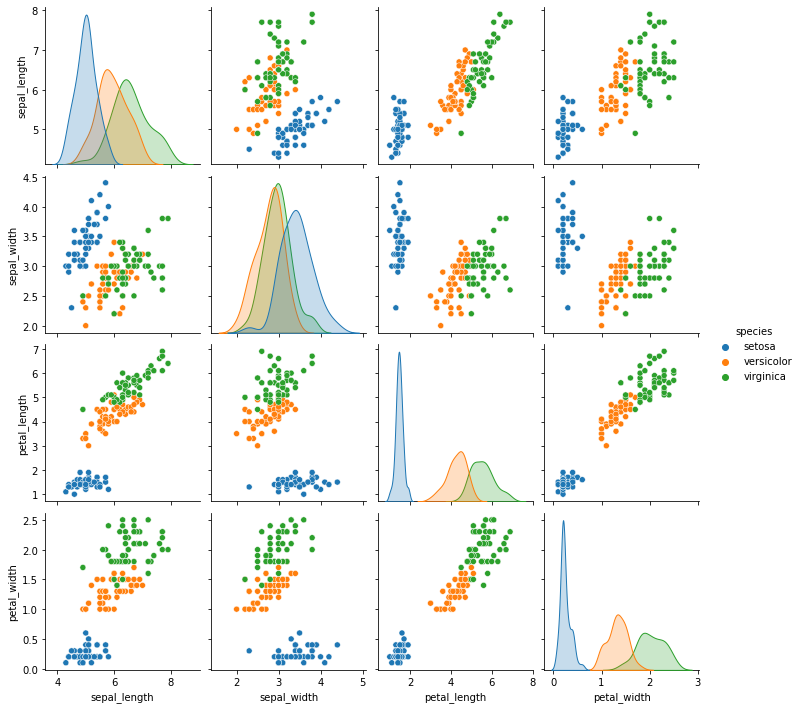

In [54]:
sns.pairplot(data= iris, hue = 'species')

Any feature other than sepal_width.   
The coefficients of correlation among the three other columns are strong.  
In particular, pedal_length and pedal_width together would provide the   
best basis for this prediction.

## Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set.   
#### Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset.    
##### What do you notice?

In [ ]:
df = sns.load_dataset('anscombe')
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [58]:
df.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Plot the x and y values from the anscombe data. 
Each dataset should be in a separate column.

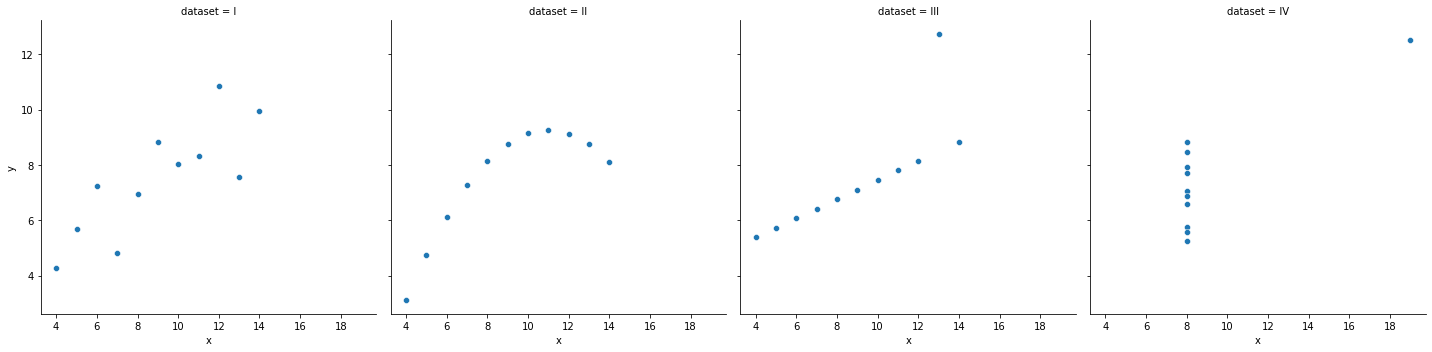

In [60]:
sns.relplot(data = df, x = 'x', y = 'y', col = 'dataset')

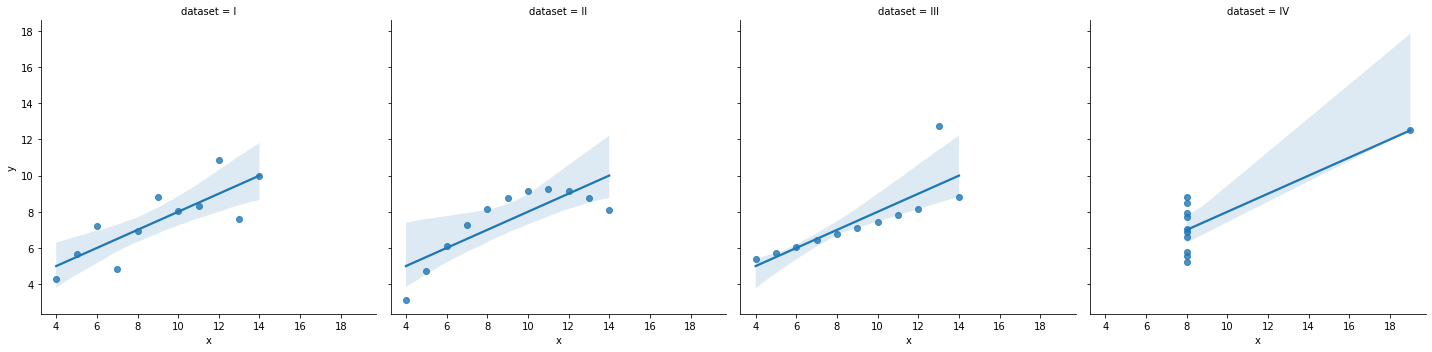

In [62]:
sns.lmplot(data = df, x = 'x', y = 'y', col = 'dataset')

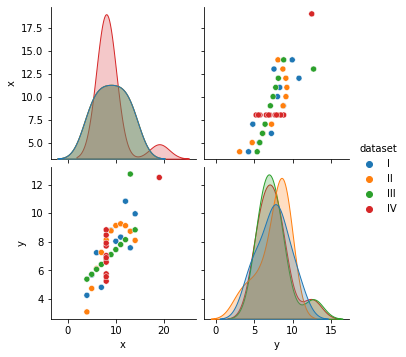

In [63]:
sns.pairplot(data = df, hue= 'dataset')

Load the InsectSprays dataset and read it's documentation.   
Create a boxplot that shows the effectiveness of the different insect sprays.

In [71]:
InsectSprays = data('InsectSprays')
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

Load the swiss dataset and read it's documentation.   
The swiss dataset is available from pydatset rather than seaborn.  
# Create visualizations to answer the following questions:

Create an attribute named is_catholic that holds a boolean value   
of whether or not the province is Catholic.     
(Choose a cutoff point for what constitutes catholic)

Does whether or not a province is Catholic influence fertility?

What measure correlates most strongly with fertility?

Using the chipotle dataset from the previous exercise,   
create a bar chart that shows the 4 most popular items   
and the revenue produced by each.

Load the sleepstudy data and read it's documentation.    
Use seaborn to create a line chart of all the individual    
subject's reaction times and a more prominant line showing    
the average change in reaction time.

print(sns.get_dataset_names()))
tips = sns.load_dataset('tips')
tips.head()
tips.info()
tips.describe()

REFRESHER: AN ASIDE. 
continuous data: numeric data with possibly infinite resolution: height, weight, temperature
categorical- distinc categories: weekdays, gender, 'smoker', letter grades
discrete: distinct numeric categories-party_size(numeric but discrete), number of customer complains, # of flaws or defects. 

Scatterplot with matplotlib
plt.scatter(tips.total_bill, tips.tip)
plt.title('Tips by Bill)

Doing it with seaborn
sns.relplot(data = tips, x='total_bill, y='tip', hue='smoker')

~ 
Bootstrapping is any test or metric that uses random sampling with replacement, and falls under the broader class of resampling methods. Bootstrapping assigns measures of accuracy to sample estimates. This technique allows estimation of the sampling distribution of almost any statistic using random sampling methods.
~

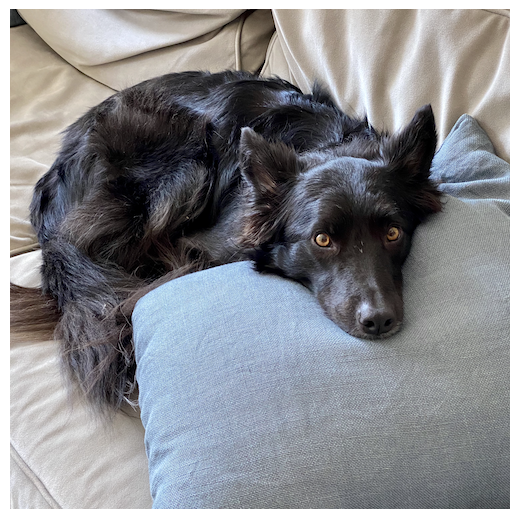

In [10]:
sns.dogplot()